# Machine Learning and Neural Networks; Lab 0

## Why do we need machine learning?

- Automatization of simple tasks
- Resolving tasks we would not be able to
- Help us in tasks that could be difficult


## Problem example:

### Knowing that the digits shown below correspond to the following labels:

In [2]:
%matplotlib notebook
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import Image, IFrame

np.set_printoptions(threshold=60000)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_train)
# print(y_train)

(60000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Here, we are loading the MNIST problem into four variables, two tuples of two variables each. Firstly, we divide the data into two halves, the train and test sets. Next, for each set, the features and the target are also divided. This particular problem consists of 784 features and a target variable. 

Although, this might seem a complicated problem because the large amount of features, if you know something about the structure of the problem, it is pretty easy. The 784 features are the result of the pixel-wise representation of 28x28 pixel-images of hadwritten digits.

What we need to do, is to say what digit is represented in each image. This is a graphical visualization of the whole train set:

<IPython.core.display.Javascript object>


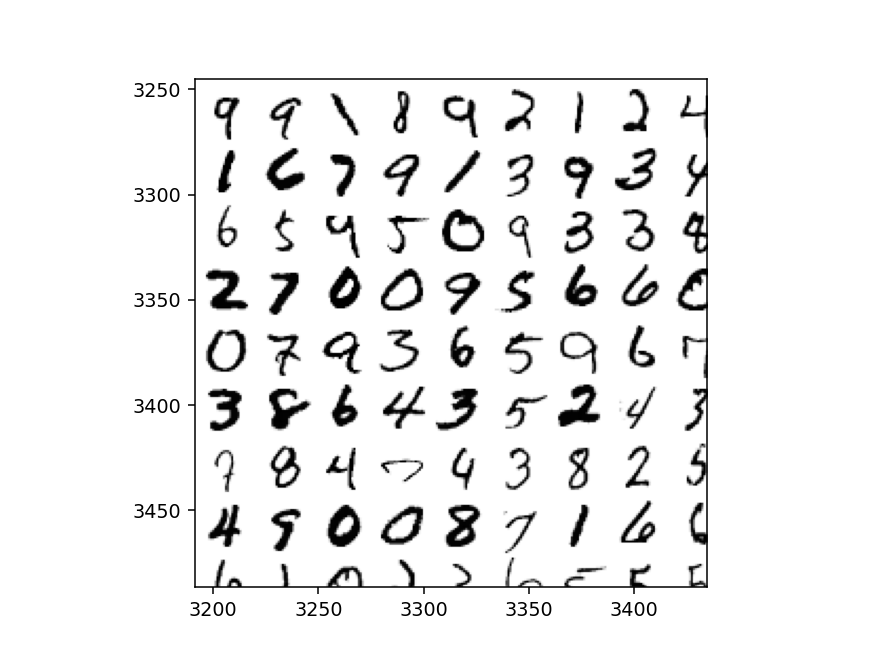

In [7]:
n = 244
images = np.concatenate([np.concatenate([x_train[i+j] for i in np.arange(0, n, 1)], axis=0) for j in np.arange(0, n**2, n)], axis=1)
fig=plt.figure(1)
plt.imshow(images, cmap="Greys")
plt.show()

\**For some reason, running the closing instruction right after the figure does not work in my computer, hence the empty cells. This may not happen to you*

In [5]:
plt.close(fig)

### Think

Knowing the task one has to perform in the MNIST problem, what kind of learning do you think has to be carried out? Supervised (classification, regression), or unsupervised (clustering, dimensionality reduction)?

How much time do you think it would take a person to learn the correspondence between the images and the digits they represent? And to label the examples in the test set?

## Please, tell me what labels these digits should be associated to

<IPython.core.display.Javascript object>


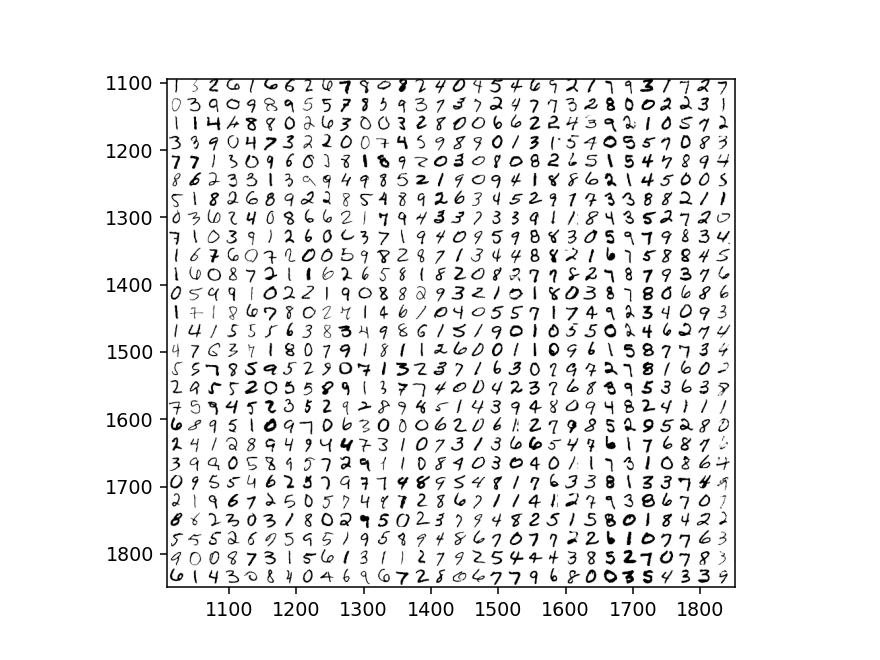

In [6]:
n=100
images = np.concatenate([np.concatenate([x_test[i+j] for i in np.arange(0, n, 1)], axis=0) for j in np.arange(0, n**2, n)], axis=1)
fig=plt.figure(2)
plt.imshow(images, cmap="Greys")
plt.show()

In [ ]:
plt.close(fig)

This would result in a very tedious process, in which one should label each digit manually, until all 10.000 images are processed.

Furthermore, in this problem, you already know the relation between the images and the label: you can easily tell the difference between a 2 and an 8. For this reason you don't need to go though the learning process of discovering the relation between the first images and the labels. This makes this problem considerably easier, but this is not always the case. Other problems in which the knowledge has not been acquired yet and needs to be built from the first image are very common.

## OR, we could simply automatize the process by learning a model

In the following cells, you can see how to fit a sklearn supervised learning algorithm (the process is similar for unsupervised algorithms) and use it to predict the target variable.

In [8]:
clf = LogisticRegression(C=50. / x_train.shape[0], penalty='l1', solver='saga', tol=0.1)
clf.fit(np.reshape(x_train, (x_train.shape[0], -1)), y_train)    

LogisticRegression(C=0.0008333333333333334, penalty='l1', solver='saga',
                   tol=0.1)

In [9]:
prediction = clf.predict(np.reshape(x_test, (x_test.shape[0], -1)))
print(prediction)

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 0 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 2 7 4 7 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 4 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 9 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 3 0 8 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 7 9 3 9 0 3 5 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 7 7 9 2 2 4 1 5 8 8 7 2 5 0 6 4 2 4 1 9 5 7 7 2 8 2
 0 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 4 2 9 2 0 4
 0 0 2 8 6 7 1 2 4 0 2 9 4 3 3 0 0 5 1 9 6 5 3 5 7 7 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 3 1 5 0 6 1 8 5 1 7 4 4 6 7 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 7 8 3 7 6 0 0 3 0
 8 0 6 4 8 5 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 9 5 8 9 6 1 8 4 1 2 8 3 1
 9 7 5 4 0 8 9 9 1 0 5 2 

What performance metric would be the adequate one for measuring the performance of the algorithm?
Check the first cell for choosing the correct one.

In [10]:
accuracy_score(y_test, prediction)

0.9236

### Exercise
Try some classifiers yourself, see if you can improve the metric obtained by the previous model. You can find many clasification algorithms here: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Make sure that you choose the classification version of the algorithms. Below you have two examples on how to import classifiers from sklearn

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = DecisionTreeClassifier()
clf.fit(np.reshape(x_train, (x_train.shape[0], -1)), y_train)

DecisionTreeClassifier()

In [19]:
prediction = clf.predict(np.reshape(x_test, (x_test.shape[0], -1)))
print(prediction)

[7 2 1 0 4 1 4 7 6 9 0 6 9 0 1 5 9 7 6 4 9 6 6 5 4 0 7 4 0 1 3 1 3 5 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 8 0 4 1 9 5 7 2 4 3 7 4 6 4 3 0 7 0 2 2
 1 7 3 7 9 7 7 6 2 7 8 4 7 3 6 1 3 6 3 3 1 4 5 7 8 9 6 0 5 4 9 9 2 8 9 6 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 4 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 8 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 3 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 6 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 8 7 1 2 8 4 1 7 3 3 8 4 7 7 2 2 4 1 5 9 8 3 2 3 0 2 4 2 4 1 9 5 7 7 2 5 2
 0 8 5 7 7 4 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 1 5 9 2 6 3 1 5 8 2 9 2 0 4
 0 0 2 8 5 7 1 9 4 0 2 7 4 3 3 0 0 2 1 9 6 5 3 8 8 7 9 3 5 4 2 0 7 1 1 2 1
 3 3 3 9 7 8 6 3 6 1 3 3 1 0 5 1 3 1 5 5 6 1 8 5 1 7 4 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 7 3 7 6 1 0 2 1 9 2 6 6 1 9 5 2 5 4 4 2 8 5 9 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 0 9 2 0 4 9 1 4 8 1 3 9 5 9 9 8 3 7 6 0 0 3 0
 3 5 2 4 0 5 3 3 2 3 9 1 2 5 8 0 5 6 6 6 9 3 8 3 7 5 8 9 6 1 8 4 1 2 8 8 1
 9 7 5 4 0 8 9 9 1 0 5 3 

In [20]:
accuracy_score(y_test, prediction)

0.8797

In [21]:
clf = RandomForestClassifier()
clf.fit(np.reshape(x_train, (x_train.shape[0], -1)), y_train)

RandomForestClassifier()

In [22]:
prediction = clf.predict(np.reshape(x_test, (x_test.shape[0], -1)))
print(prediction)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 8 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 8 8 7 2 3 0 6 4 2 4 1 9 5 7 7 2 8 2
 0 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 4 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 1 7 9 3 5 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 3 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 9 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 2 0 6 9 8 5 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 3 1
 9 7 5 4 0 8 9 9 1 0 5 2 

In [23]:
accuracy_score(y_test, prediction)

0.97

As you can see, different models offer different performances when facing different problems. There is no classification algorithm superior to the rest for any given problem, for which the selection of the adequate method in each case is critical.

## More complicated problems

In the previous example, we could easily identify the images with the current digit, although the problem ended up scaling aways from our capabilities as the number of samples to be labeled increased. We will not, however, have the necessary knowledge for predicting the correct value for the target variable in every situation:

In [24]:
db = fetch_california_housing()
np.set_printoptions(threshold=60000)
print(db.DESCR)
print(db.feature_names)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Let's try to visualize the data so that we can start understanding the data

<IPython.core.display.Javascript object>


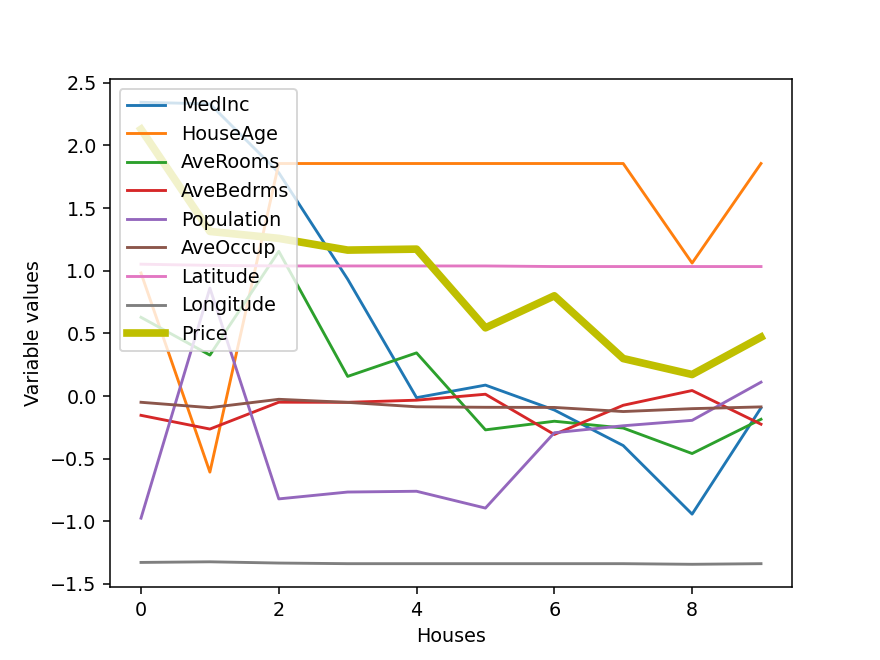

In [32]:
fig = plt.figure(3)
for index, feature in enumerate(db.feature_names):
    plt.plot(db.data[:10, index], label=feature)
plt.plot(db.target[:10], label="Price", linewidth=4, c="y")
plt.xlabel("Houses")
plt.ylabel("Variable values")
plt.legend(loc=2)  

In [ ]:
plt.close(fig)

As you can see, some variables have much larger values than others, and because of this reason, we cannot visualize the data correctly.

Scaling the variables to the same range of values should improve the visualization:

In [26]:
db.data = scale(db.data)
db.target = scale(db.target)

For example, could you predict the prices of the last four houses in the figure?

<IPython.core.display.Javascript object>


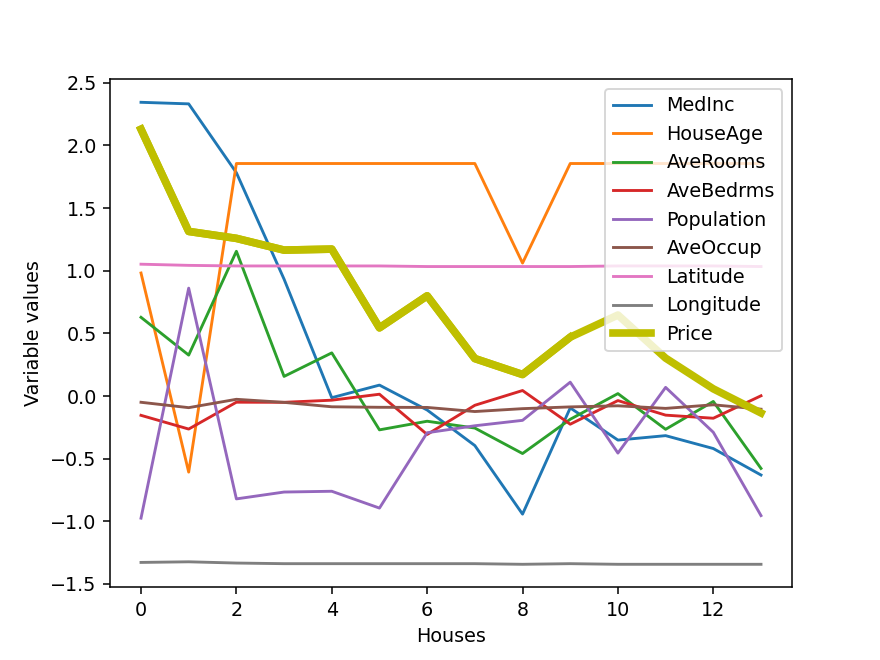

In [29]:
fig = plt.figure(5)
for index, feature in enumerate(db.feature_names):
    plt.plot(db.data[:14, index], label=feature)
plt.plot(db.target[:10], label="Price", linewidth=4, c="y")
plt.xlabel("Houses")
plt.ylabel("Variable values")
plt.legend(loc=0)  

In this case, what kind of problem are we facing? Why?
Make a guess and run the following cell to see how close you were

In [30]:
plt.plot(db.target[:14], label="Price", linewidth=4, c="y")

In [ ]:
plt.close(fig)

In this case, predicting the price of a house is not that easy. But we can learn a similar model to the previous one. We firstly divide the dataset in train and test sets, and then define a regressor. Try to fill in the parameters. Take a look to the previous instance of a sklearn predictor if necessary.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target, test_size=0.33, random_state=0)
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)  

RandomForestRegressor(max_depth=10, random_state=0)

In [34]:
pred = regr.predict(X_test)

<IPython.core.display.Javascript object>


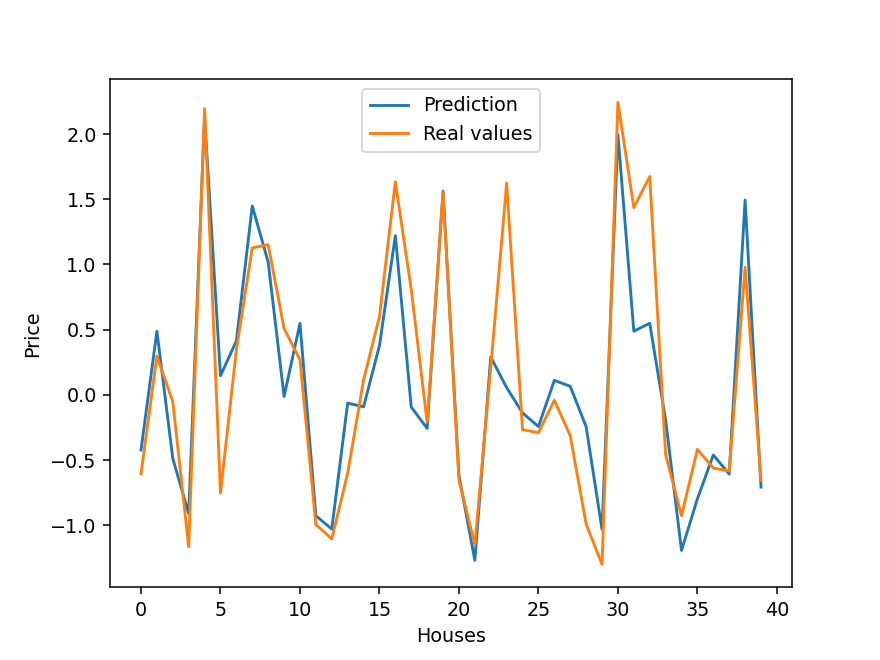

Mean squared error: 0.23619819892252217


In [35]:
fig = plt.figure(3)

plt.plot(pred[:40], label="Prediction")
plt.plot(y_test[:40], label="Real values")
plt.xlabel("Houses")
plt.ylabel("Price")
plt.legend()
print("Mean squared error:", mean_squared_error(y_test, pred))

Again, using a single algorithm (in this case for solving a regression problem) is not a good practice, and if you want, you can try other algorithms to improve the result obtained by the Random Forest.

In [ ]:
plt.close(fig)

## Help us in difficult tasks

In many cases, it is helpful discovering paterns that remain latent in our data, which could lead up to interesting conclusions.

For example, in case you are asked to distinguish two groups of flowers from these available in the following database:


*This code is an adaptation of that found in https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py*

In [53]:
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
print(X.shape)
print(y.shape)

(150, 4)
(150,)


The Iris database consists of 150 observations of four variables of flowers. As MNIST, it is a classification problem, which means that we know the number of groups in our data. Anyways, let's assume we don't, and that we have to guess. 

Because there are more variables than dimensions we can observe, we will have to make visualizations of three of the variables (the most informative ones). 

In [54]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=48, azim=134)
dimensions = [3, 2, 0]

ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]])

ax.set_xlabel(features[dimensions[0]])
ax.set_ylabel(features[dimensions[1]])
ax.set_zlabel(features[dimensions[2]])

<IPython.core.display.Javascript object>

Text(0.5, 0, 'sepal length (cm)')

In [55]:
plt.close(fig)

It seems pretty clear that two different groups are merged in this database. We are going to use KMeans, an algorithm which is used to perform clustering (or unsupervised classification) and see whether it agrees with our perception. 

In [56]:
est = KMeans(n_clusters=2)
est.fit(X)
labels = est.labels_

In [57]:
fig = plt.figure(figsize=(8, 6))

dimensions = [3, 0, 2]
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]], c=labels.astype(np.float))

ax.set_xlabel(features[dimensions[0]])
ax.set_ylabel(features[dimensions[1]])
ax.set_zlabel(features[dimensions[2]])

<IPython.core.display.Javascript object>

Text(0.5, 0, 'petal length (cm)')

In [58]:
plt.close(fig)

Apparently, the clustering is pretty accurate, with the exception of a few elements in the larger group which are classified with the first one.

However, if we take a look at the class vector,

In [59]:
print(np.unique(y))
print(iris.target_names)

[0 1 2]
['setosa' 'versicolor' 'virginica']


We see that we have three different classes. Let's see what KMeans does when this information is added to the problem

In [60]:
est = KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_

<IPython.core.display.Javascript object>


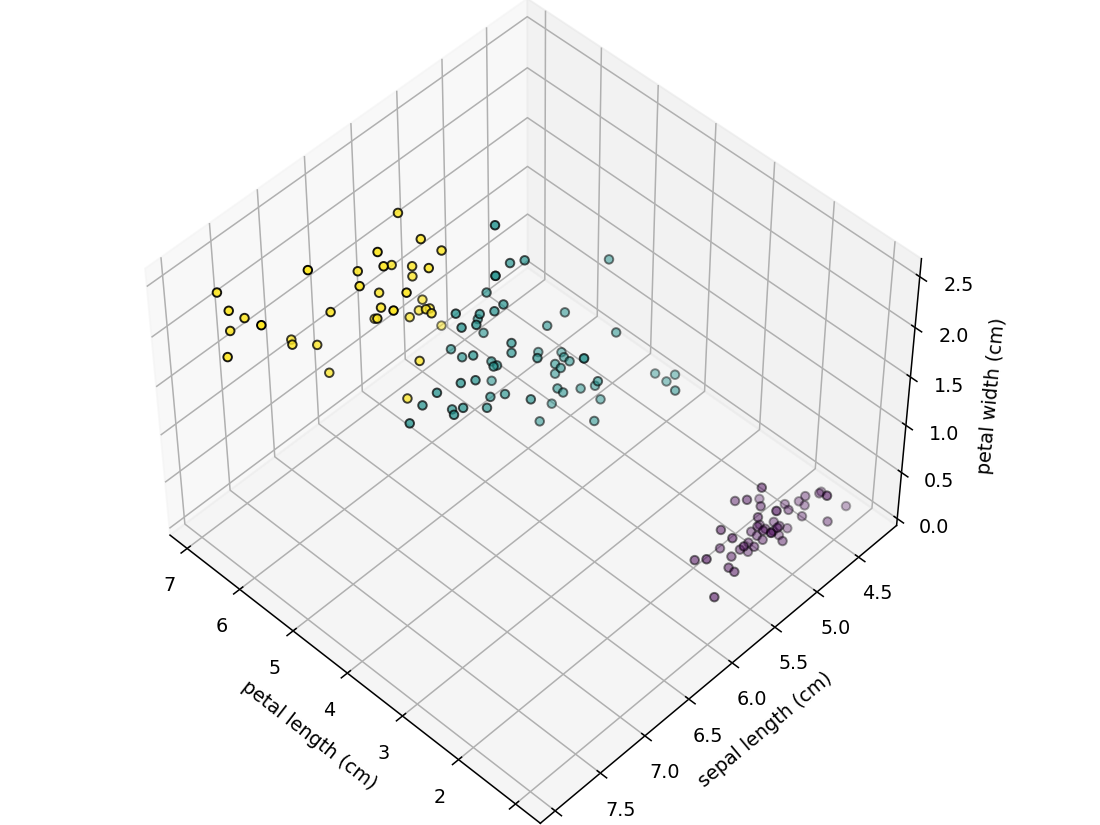

Text(0.5, 0, 'petal width (cm)')

In [61]:
fig = plt.figure(figsize=(8, 6))
dimensions = [2, 0, 3]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]], c=labels.astype(np.float), edgecolor='k')

ax.set_xlabel(features[dimensions[0]])
ax.set_ylabel(features[dimensions[1]])
ax.set_zlabel(features[dimensions[2]])

In [62]:
plt.close(fig)

And what this same information looks like with the ground truth:

<IPython.core.display.Javascript object>


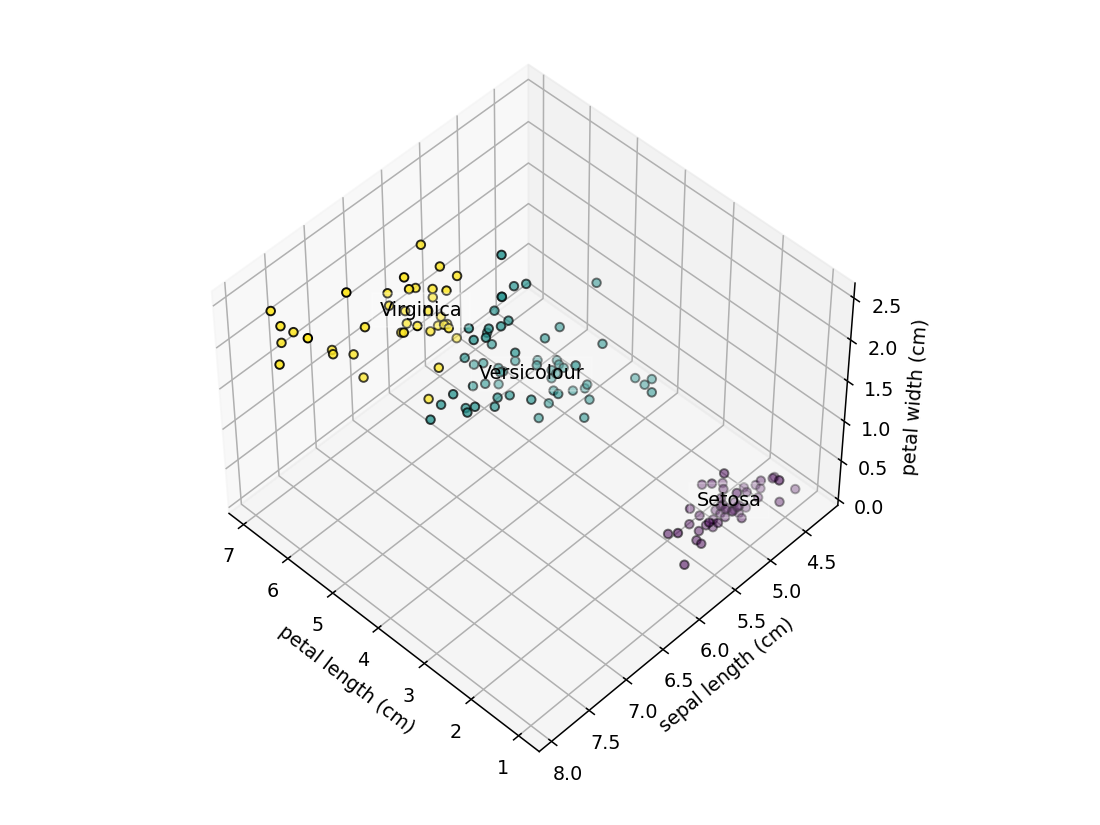

In [63]:
fig = plt.figure(figsize=(8, 6))
dimensions = [2, 0, 3]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]], c=labels.astype(np.float), edgecolor='k')

ax.set_xlabel(features[dimensions[0]])
ax.set_ylabel(features[dimensions[1]])
ax.set_zlabel(features[dimensions[2]])

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, dimensions[0]].mean(),
              X[y == label, dimensions[1]].mean(),
              X[y == label, dimensions[2]].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
ax.dist = 12

fig.show()

In [64]:
plt.close(fig)

And the number of mistakes it made:

In [65]:
np.sum(labels!=y)

16

#### Now, lets see another synthetic (and more complex) example:

In [67]:
data = np.load("SyntheticData2.npy")
X = data[:, :-1]
print(X.shape)

(80, 3)


We can see that we have a small DB of 80 examples and 3 variables per observation. Again, let's try to guess how many classes we have via visualization:

<IPython.core.display.Javascript object>


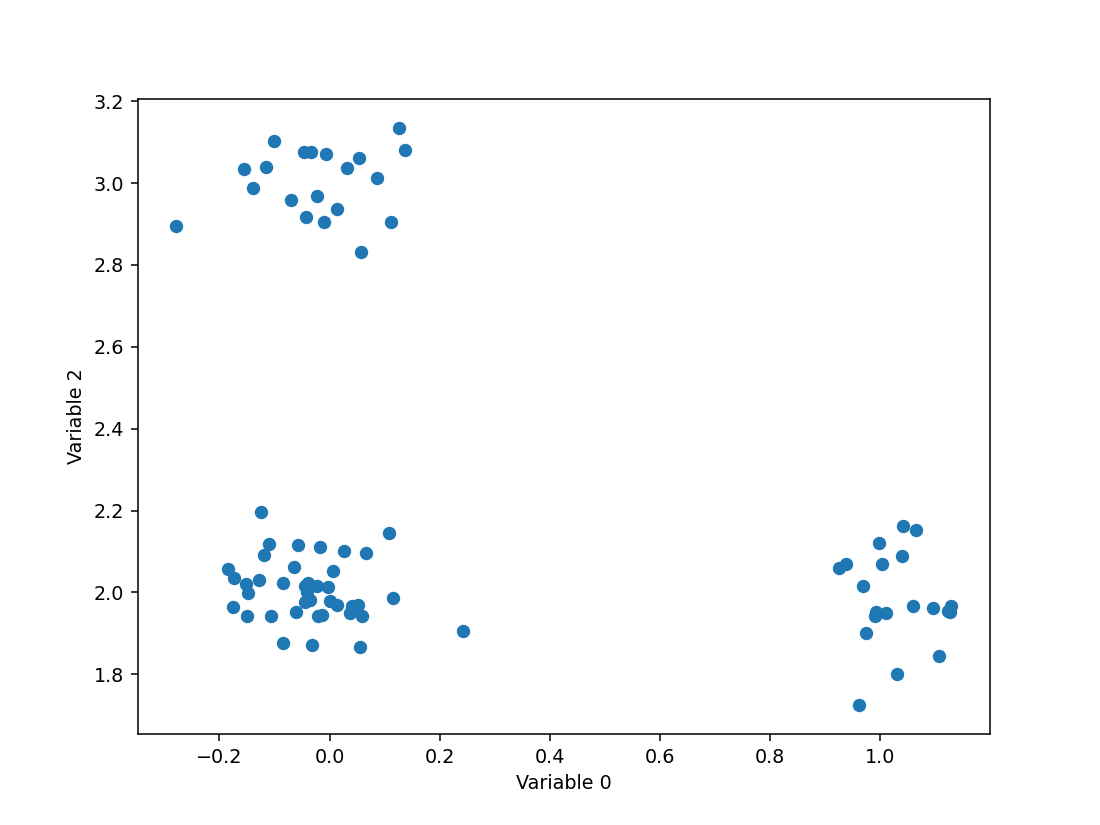

Text(0, 0.5, 'Variable 2')

In [68]:
fig = plt.figure(figsize=(8, 6))
dimensions = [0, 2]
plt.scatter(X[:, dimensions[0]], X[:, dimensions[1]])

plt.xlabel("Variable " + str(dimensions[0]))
plt.ylabel("Variable " + str(dimensions[1]))

In [69]:
plt.close(fig)

At a first glance, it seems clear that we have four different clusters. Let's see what KMeans does

In [70]:
est = KMeans(n_clusters=3,random_state=0)
est.fit(X)
labels = est.labels_

<IPython.core.display.Javascript object>


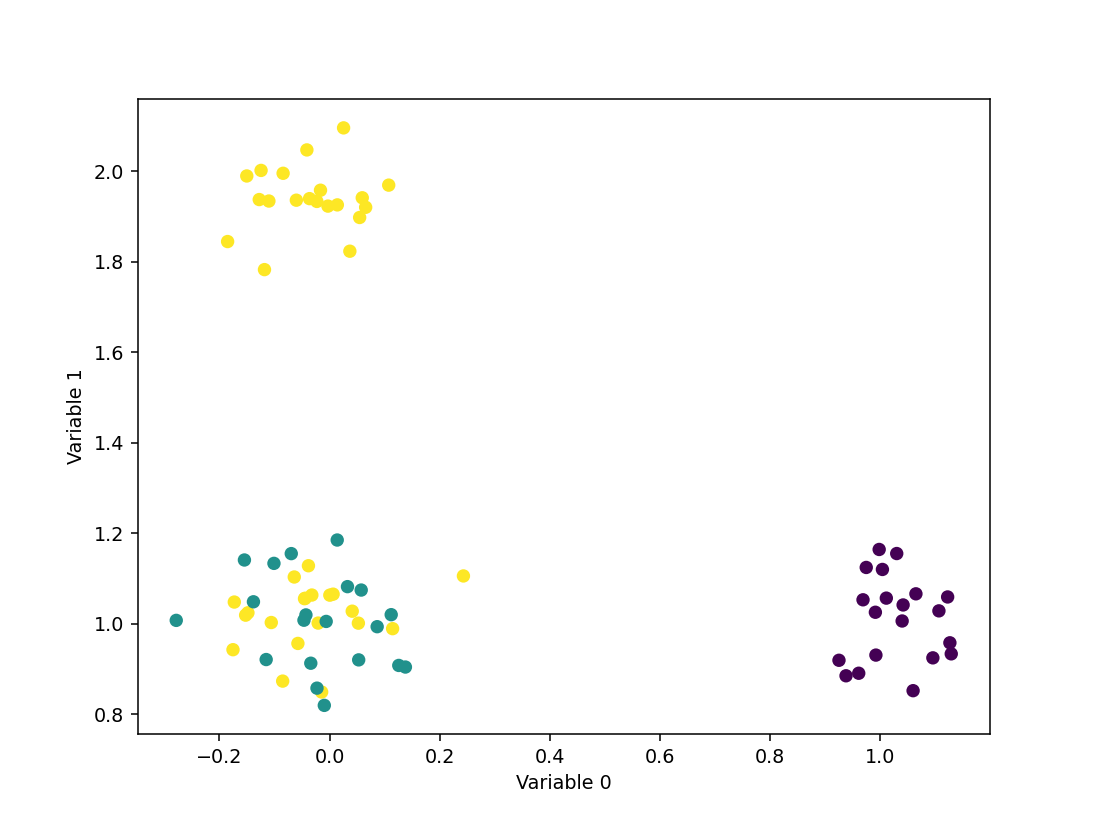

Text(0, 0.5, 'Variable 1')

In [71]:
fig = plt.figure(figsize=(8, 6))
dimensions = [0, 1]
plt.scatter(X[:, dimensions[0]], X[:, dimensions[1]], c=labels)

plt.xlabel("Variable " + str(dimensions[0]))
plt.ylabel("Variable " + str(dimensions[1]))

In [72]:
plt.close(fig)

<IPython.core.display.Javascript object>


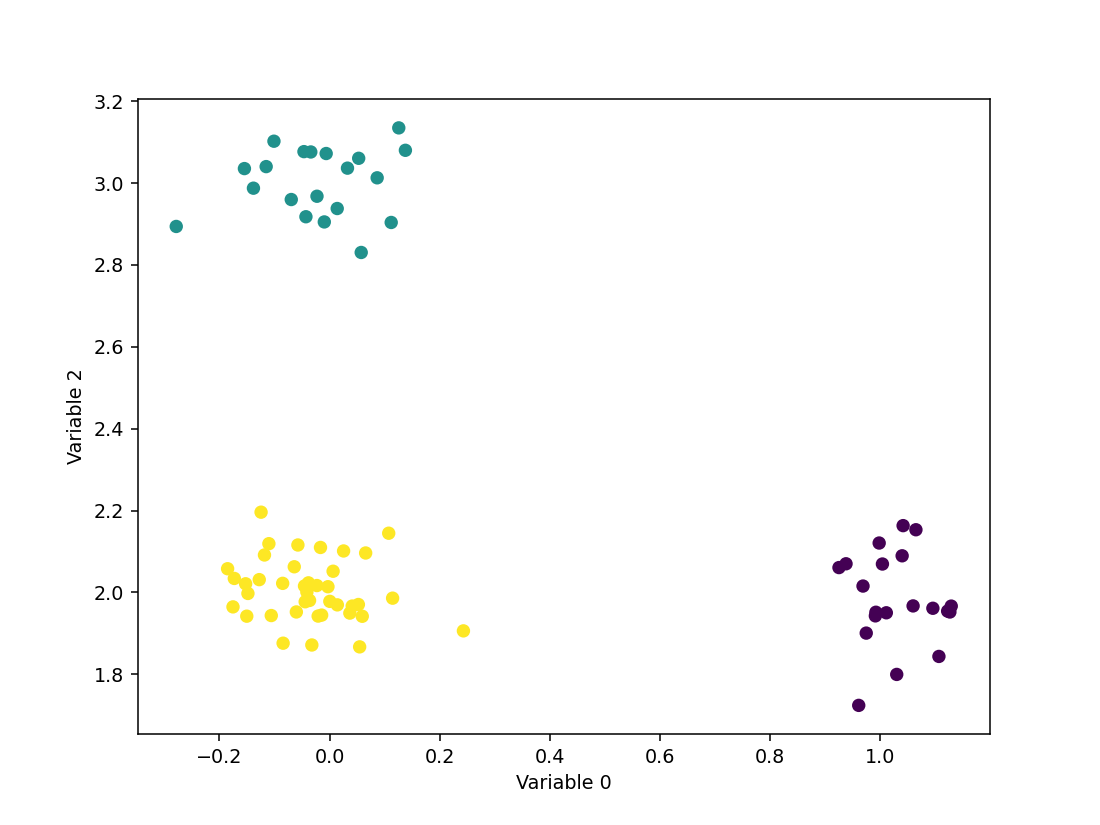

Text(0, 0.5, 'Variable 2')

In [73]:
fig = plt.figure(figsize=(8, 6))
dimensions = [0, 2]
plt.scatter(X[:, dimensions[0]], X[:, dimensions[1]], c=labels)

plt.xlabel("Variable " + str(dimensions[0]))
plt.ylabel("Variable " + str(dimensions[1]))

In [74]:
plt.close(fig)

<IPython.core.display.Javascript object>


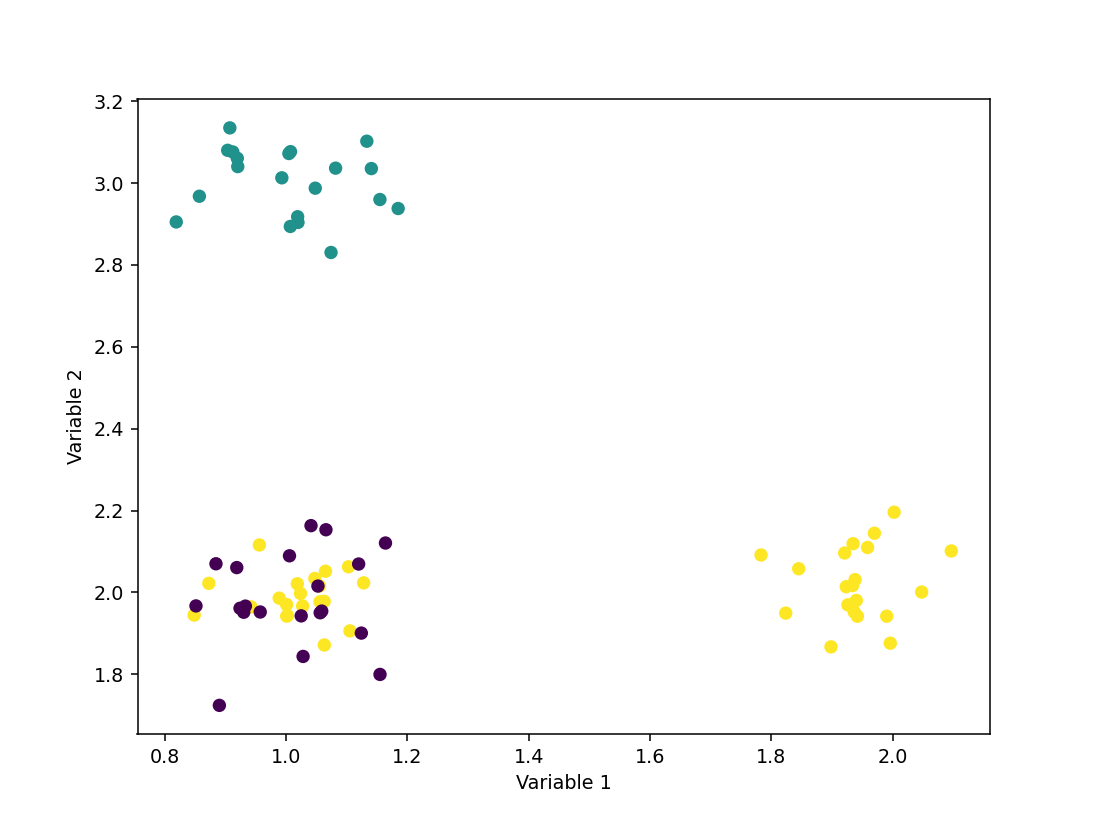

Text(0, 0.5, 'Variable 2')

In [75]:
fig = plt.figure(figsize=(8, 6))
dimensions = [1, 2]
plt.scatter(X[:, dimensions[0]], X[:, dimensions[1]], c=labels)

plt.xlabel("Variable " + str(dimensions[0]))
plt.ylabel("Variable " + str(dimensions[1]))

In [76]:
plt.close(fig)

If we visualize variables 0 and 1, the grouping seems correct, but when variable 2 is used, the clusters seem irregular. Why would that be?

Let's visualize all three variables at the same time:

In [77]:
fig = plt.figure(figsize=(8, 6))
dimensions = [0, 1, 2]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]])

ax.set_xlabel("Variable " + str(dimensions[0]))
ax.set_ylabel("Variable " + str(dimensions[1]))
ax.set_zlabel("Variable " + str(dimensions[2]))

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Variable 2')

We can clearly see that we have four different groups, although we thought we only had three when we made the 2D visualizations. Now let's see what KMeans did:

In [78]:
plt.close(fig)

<IPython.core.display.Javascript object>


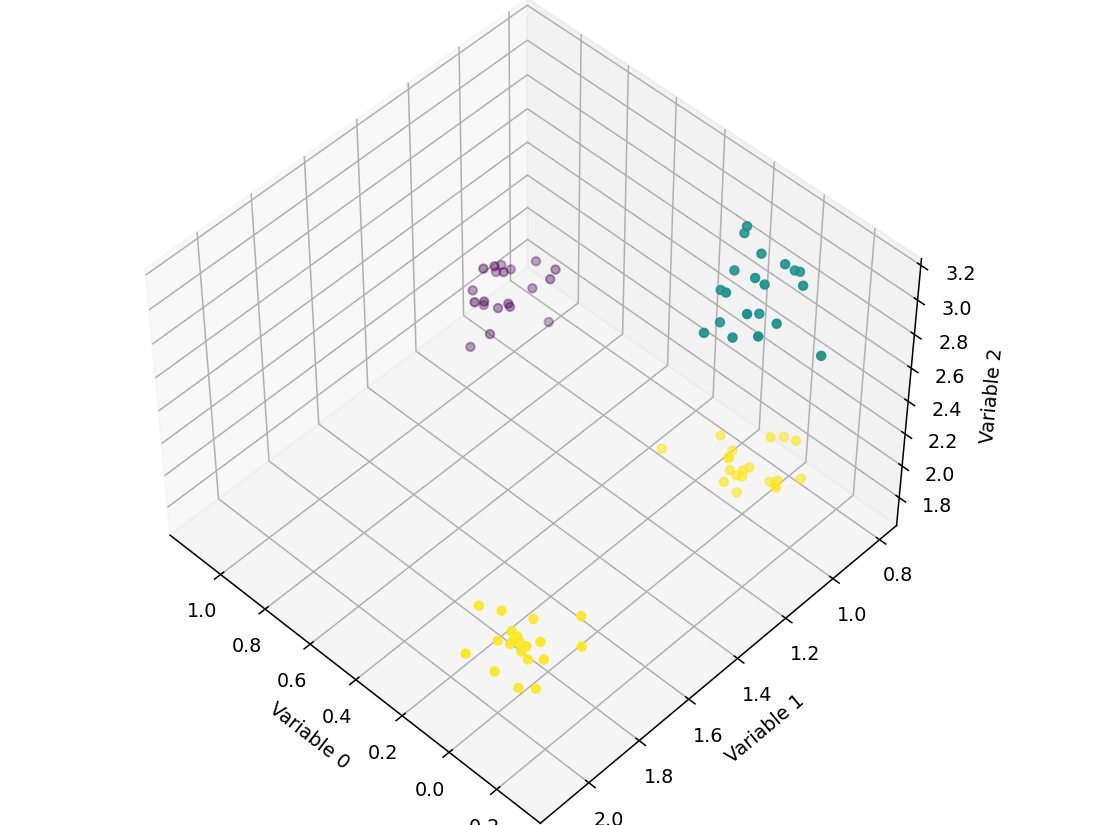

Text(0.5, 0, 'Variable 2')

In [79]:
fig = plt.figure(figsize=(8, 6))
dimensions = [0, 1, 2]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]], c=labels)

ax.set_xlabel("Variable " + str(dimensions[0]))
ax.set_ylabel("Variable " + str(dimensions[1]))
ax.set_zlabel("Variable " + str(dimensions[2]))

KMeans did exactly what we told it to do, it created three groups from the provided data. What would happen if we added a fourth group?

In [80]:
plt.close(fig)

In [81]:
est4 = KMeans(n_clusters=4,random_state=0)
est4.fit(X)
labels4 = est4.labels_

<IPython.core.display.Javascript object>


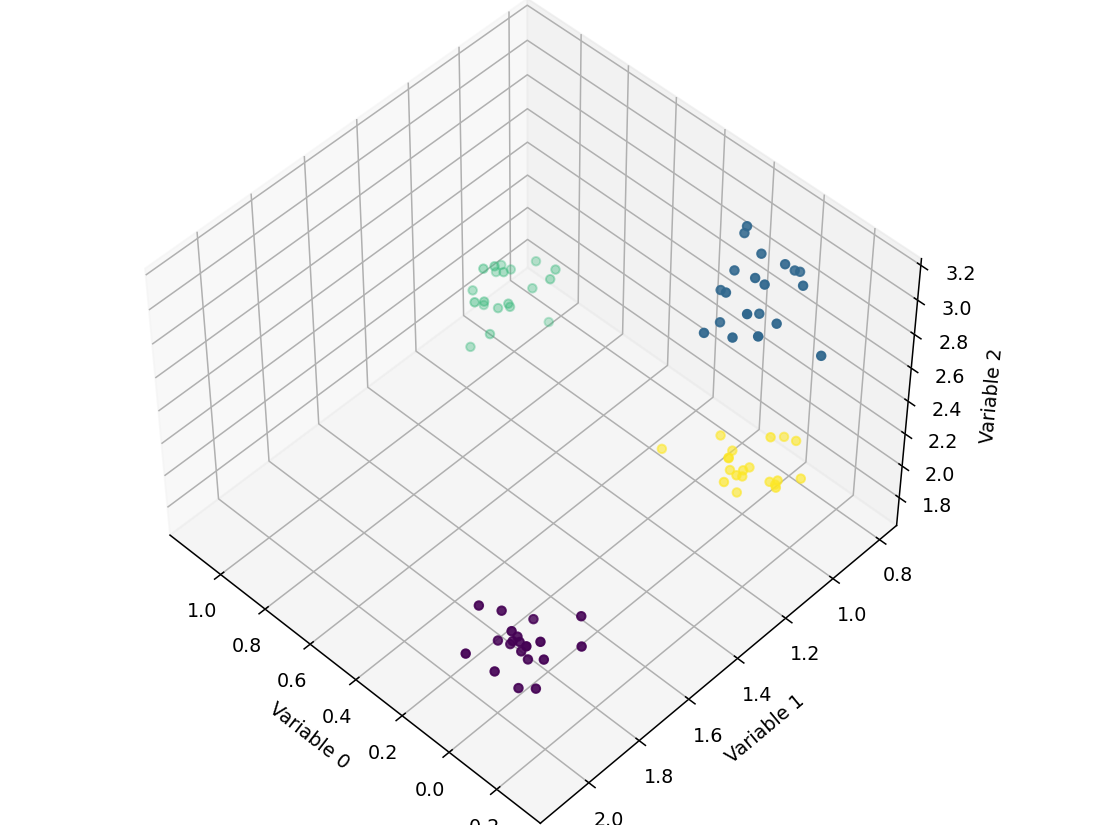

Text(0.5, 0, 'Variable 2')

In [82]:
fig = plt.figure(figsize=(8, 6))
dimensions = [0, 1, 2]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]], c=labels4)

ax.set_xlabel("Variable " + str(dimensions[0]))
ax.set_ylabel("Variable " + str(dimensions[1]))
ax.set_zlabel("Variable " + str(dimensions[2]))

Now the clustering seems more accurate. The solution of visualizing more dimensions will not be available in most cases, though. Hardly ever will we find a database with three or less variables. A similar example with four variables can be found below:

In [83]:
plt.close(fig)

In [84]:
data = np.load("SyntheticData3.npy")
X = data[:, :-1]
print(X.shape)

(100, 4)


<IPython.core.display.Javascript object>


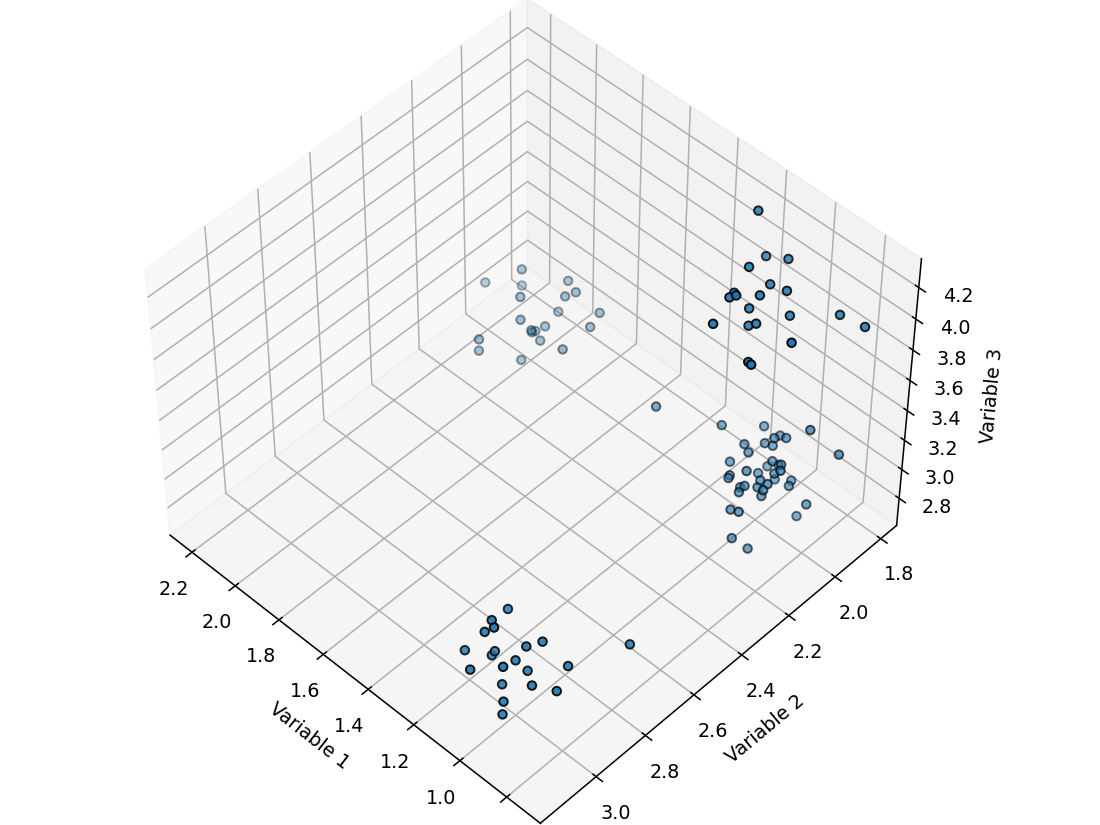

Text(0.5, 0, 'Variable 3')

In [85]:
fig = plt.figure(figsize=(8, 6))
dimensions = [1, 2, 3]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]], edgecolor='k')

ax.set_xlabel("Variable " + str(dimensions[0]))
ax.set_ylabel("Variable " + str(dimensions[1]))
ax.set_zlabel("Variable " + str(dimensions[2]))

In [86]:
plt.close(fig)

In [87]:
est = KMeans(n_clusters=4,random_state=0)
est.fit(X)
labels = est.labels_

In [88]:
fig = plt.figure(figsize=(8, 6))
dimensions = [2, 3, 0]
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, dimensions[0]], X[:, dimensions[1]], X[:, dimensions[2]], c=labels, edgecolor='k')

ax.set_xlabel("Variable " + str(dimensions[0]))
ax.set_ylabel("Variable " + str(dimensions[1]))
ax.set_zlabel("Variable " + str(dimensions[2]))

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Variable 0')

As can be seen, visualization is not always useful. The data has to be prepared to be visualized.

In [89]:
plt.close(fig)

## The importance of visualization

The following database contains a rather simple regression problem. It consists of three variables and a single target value, for which reason its visualization is not too complicated

In [90]:
data = np.load("simple.npy")
x, y = data[:, :3], data[:, 3]

<IPython.core.display.Javascript object>


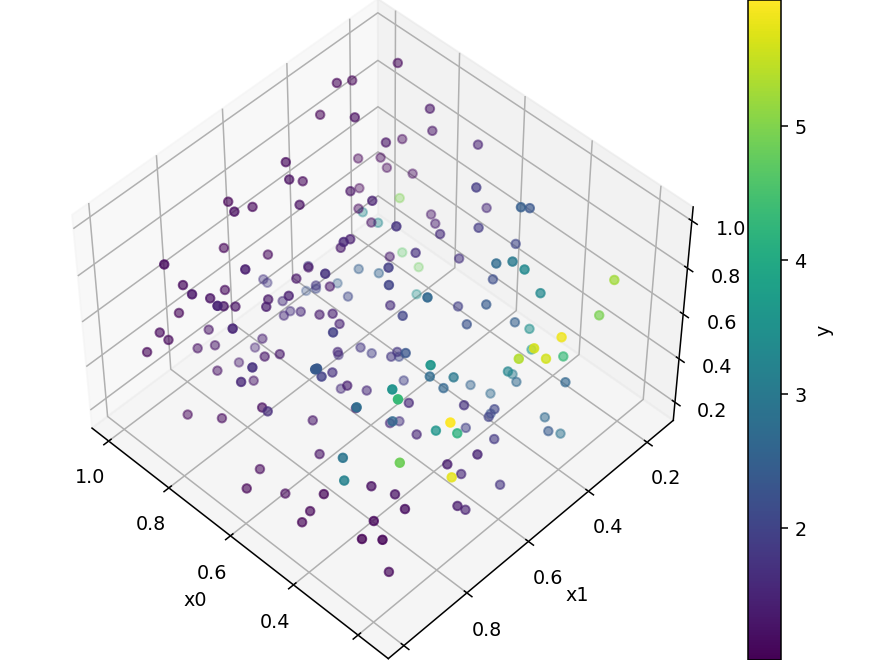

In [92]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)
# The first three parameters correspond with the shown points. The fourth one, with the colors
p = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)  

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')
fig.colorbar(p, label="y")

In [93]:
plt.close()

### Exercise

Try to discover different patterns usign variations of the visualization provided above.

Firstly, we try different visualizations including the target variable:

<IPython.core.display.Javascript object>


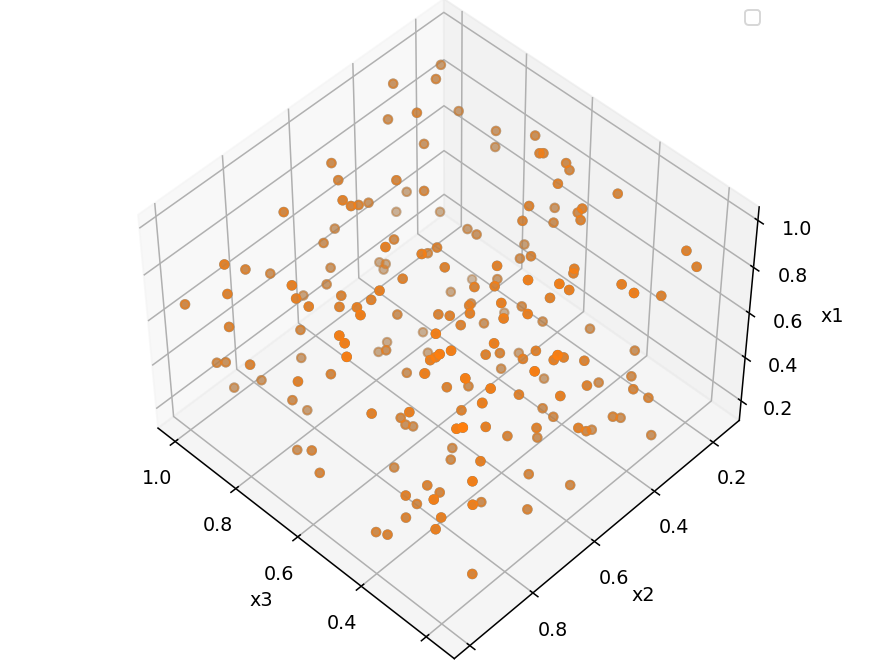

No handles with labels found to put in legend.


In [139]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)

ax.scatter(x[:, 2], x[:, 1], x[:, 0])

ax.scatter(x[:, 2], x[:, 1], x[:, 0])
ax.set_xlabel('x3')
ax.set_ylabel('x2')
ax.set_zlabel('x1')
plt.legend()

In [140]:
plt.close(fig)

<IPython.core.display.Javascript object>


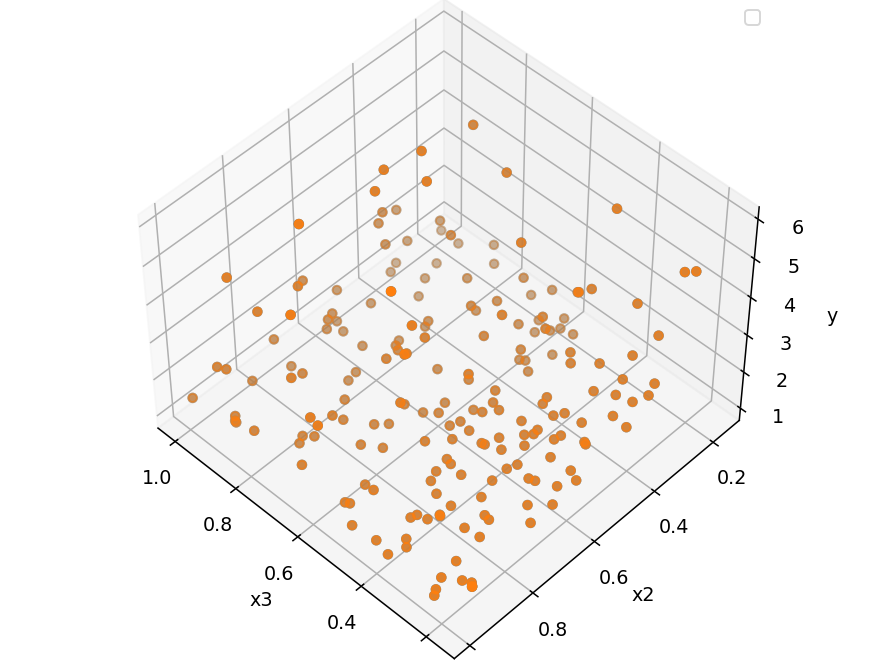

No handles with labels found to put in legend.


In [141]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)

ax.scatter(x[:, 2], x[:, 1], y)

ax.scatter(x[:, 2], x[:, 1], y)
ax.set_xlabel('x3')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend()

In [142]:
plt.close(fig)

In [143]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)

ax.scatter(x[:, 2], x[:, 0], y)

ax.scatter(x[:, 2], x[:, 0], y)
ax.set_xlabel('x3')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend()

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


In [144]:
plt.close(fig)

In [145]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)

ax.scatter(x[:, 1], x[:, 0], y)

ax.scatter(x[:, 1], x[:, 0], y)
ax.set_xlabel('x2')
ax.set_ylabel('x1')
ax.set_zlabel('xy')
plt.legend()

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


In [146]:
plt.close(fig)

In [147]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)

#Firstly, we try different com
x_aux = x[x[:, 2]<0.5]
y_aux = y[x[:, 2]<0.5]

ax.scatter(x_aux[:, 0], x_aux[:, 1], y_aux, label="x3<0.5")
x_aux = x[x[:, 2]>0.5]
y_aux = y[x[:, 2]>0.5]

ax.scatter(x_aux[:, 0], x_aux[:, 1], y_aux, label="x3>0.5")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.legend()

<IPython.core.display.Javascript object>

In [148]:
plt.close(fig)

<IPython.core.display.Javascript object>


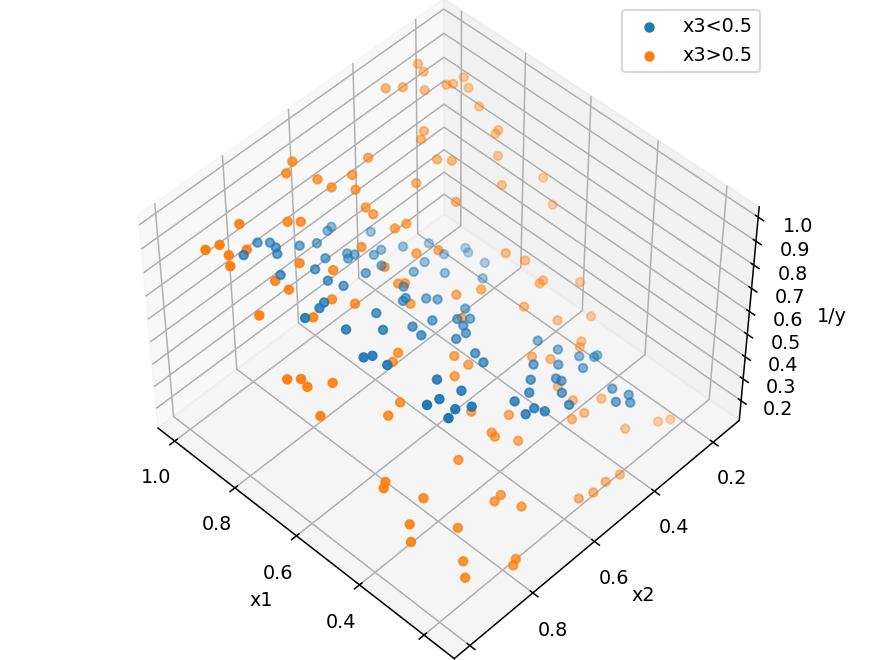

In [149]:
fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)

#Firstly, we try different com
x_aux = x[x[:, 2]<0.5]
y_aux = y[x[:, 2]<0.5]

ax.scatter(x_aux[:, 0], x_aux[:, 1], 1/y_aux, label="x3<0.5")
x_aux = x[x[:, 2]>0.5]
y_aux = y[x[:, 2]>0.5]

ax.scatter(x_aux[:, 0], x_aux[:, 1], 1/y_aux, label="x3>0.5")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('1/y')
plt.legend()

In [150]:
plt.close(fig)

## Visualize complex data

Anyways, visualization results in many cases helpful to understand a problem, and several techniques that help us transform high dimensional data (databases with many variables) so that it can be visualized in two or three dimensions have been developed.

The code below is an adaptation of that found in https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b


We are going to use the MNIST database again. It has 28x28=784 variables per observation, which is significantly larger than our limit, three. 

In [110]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.reshape(x_train, (-1, 28*28))
x_test = np.reshape(x_test, (-1, 28*28))

Observing the three cells below, would you say that the PCA method is supervised, or unsipervised? Why? What does it do?

In [111]:
pca = PCA(n_components=3)
pca.fit(x_train)

PCA(n_components=3)

Now we have a method capable of taking MNIST data and reducing it to three dimensions, which is manageable for our brain

In [112]:
reduced_x = pca.transform(x_test)

In [113]:
print(x_test.shape, reduced_x.shape)

(10000, 784) (10000, 3)


<IPython.core.display.Javascript object>


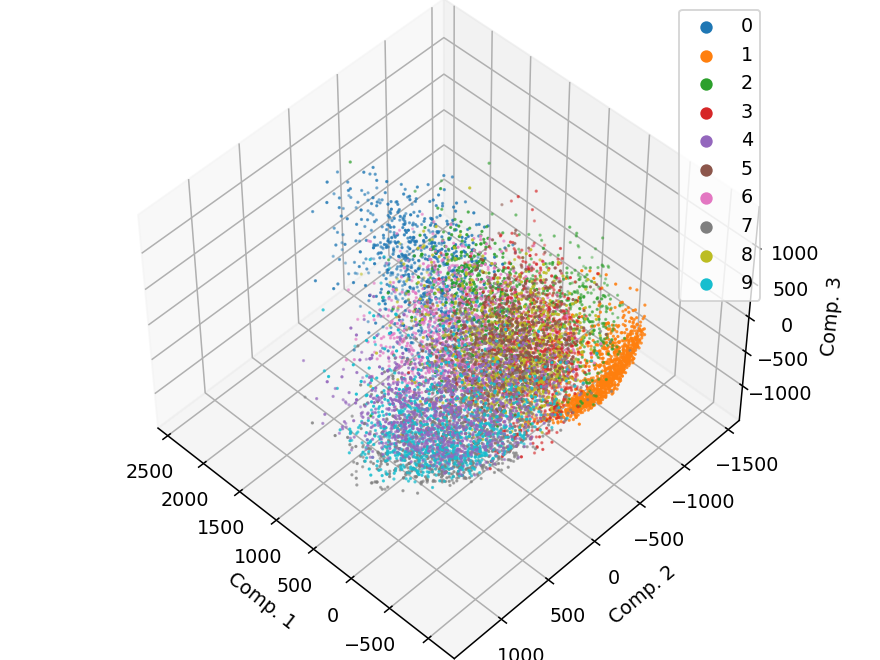

In [114]:
fig = plt.figure(1)
ax = Axes3D(fig, elev=48, azim=134)

for i in range(10):
    ax.scatter(reduced_x[y_test==i, 0], reduced_x[y_test==i, 1], reduced_x[y_test==i, 2], s=0.5, label=str(i))

lgnd = plt.legend()
ax.set_xlabel('Comp. 1')
ax.set_ylabel('Comp. 2')
ax.set_zlabel('Comp. 3')

for i in range(10):
    lgnd.legendHandles[i]._sizes = [30]


In [115]:
plt.close(fig)

As you can see, the expressiveness of the data has been maintained to some degree. However, if we didn't know the classes, as in the Iris problem, the dimensionality reduction would not have been very useful:

In [116]:
fig = plt.figure(1)
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(reduced_x[:, 0], reduced_x[:, 1], reduced_x[:, 2], s=0.5)

ax.set_xlabel('Comp. 1')
ax.set_ylabel('Comp. 2')
ax.set_zlabel('Comp. 3')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Comp. 3')

In [117]:
plt.close(fig)

Other more complex techniques can find more success in these scenarios. Of course, this method complexity comes with an increased computational complexity, and therefore a larger elapsed time. Because of this, you have to be aware of the requirements of each algorithm.

In this case, the selected algorithm is so complex that we are using a simpler one so that its computation time is kept within reasonable bounds. Anyways, because it still is considerably costly, you are getting it already computed.

In [119]:
pca = PCA(n_components=100)
trans = pca.fit_transform(x_train)

In [123]:
if not os.path.isfile("tsne.npy"):
    tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
    tsne_trans = tsne.fit_transform(trans)
    np.save("tsne.npy", tsne_trans)
else:
    tsne_trans = np.load("tsne.npy")

In [124]:
if not os.path.isfile("tsne3.npy"):
    tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
    tsne_trans3 = tsne.fit_transform(trans)
    np.save("tsne3.npy", tsne_trans)
else:
    tsne_trans3 = np.load("tsne3.npy")

Now, even if you didn't know how many classes there were beforehand, this visualization can give you a hint

In [126]:
fig = plt.figure(1)
plt.scatter(tsne_trans[:, 0], tsne_trans[:, 1], s=0.5)
plt.xlabel('TSNE dim. 1')
plt.ylabel('TSNE dim. 2')
plt.show()

<IPython.core.display.Javascript object>

In [127]:
plt.close(fig)

And indeed, this method correctly *classified* most of the observations although it didn't know how many classes there were.

<IPython.core.display.Javascript object>


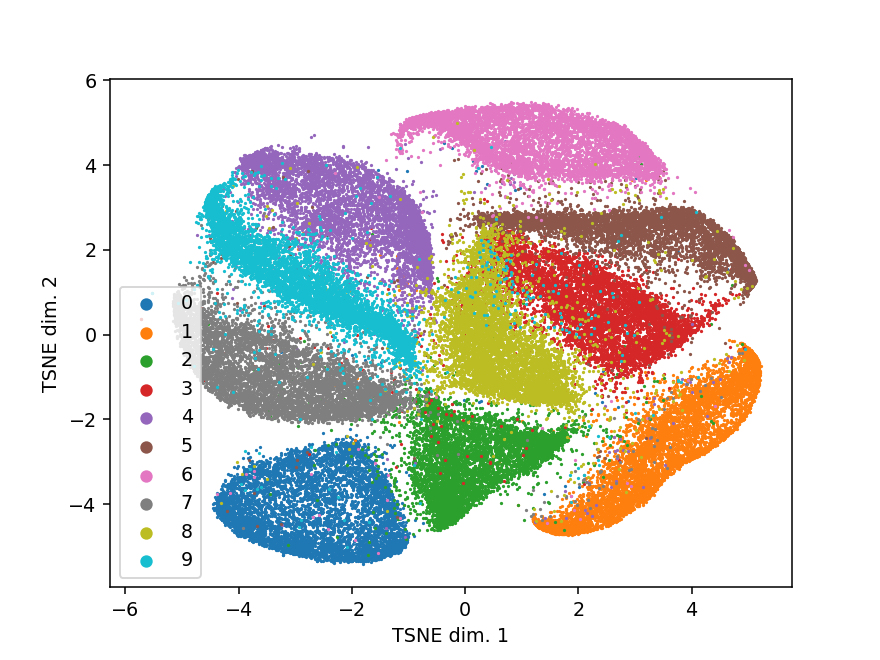

In [128]:
fig = plt.figure(1)

for i in range(10):
    plt.scatter(tsne_trans[y_train==i, 0], tsne_trans[y_train==i, 1], s=0.5, label=str(i))
plt.xlabel('TSNE dim. 1')
plt.ylabel('TSNE dim. 2')
lgnd = plt.legend()
for i in range(10):
    lgnd.legendHandles[i]._sizes = [30]

In [129]:
plt.close(fig)

Adding a third dimension can in some cases make this task easier, as more information is displayed, even though it may be a little bit more difficult to manage it.

<IPython.core.display.Javascript object>


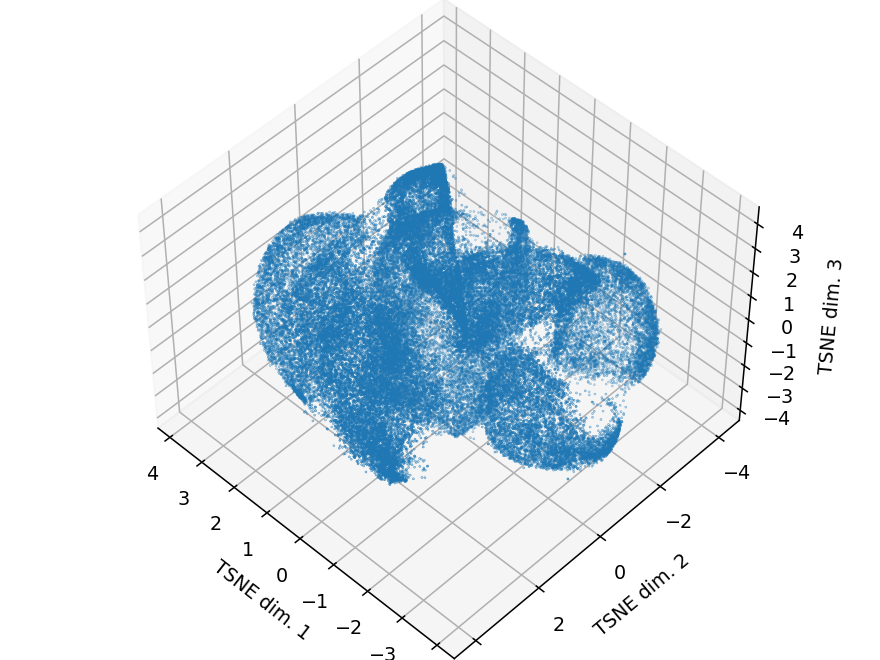

Text(0.5, 0, 'TSNE dim. 3')

In [130]:
fig = plt.figure(1)
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(tsne_trans3[:, 0], tsne_trans3[:, 1], tsne_trans3[:, 2], s=0.1)

ax.set_xlabel('TSNE dim. 1')
ax.set_ylabel('TSNE dim. 2')
ax.set_zlabel('TSNE dim. 3')

In [131]:
plt.close(fig)

In [133]:
fig = plt.figure(1)
ax = Axes3D(fig, elev=48, azim=134)
for i in range(10):
    ax.scatter(tsne_trans3[y_train==i, 0], tsne_trans3[y_train==i, 1], tsne_trans3[y_train==i, 2], s=0.5, label=str(i))

ax.set_xlabel('TSNE dim. 1')
ax.set_ylabel('TSNE dim. 2')
ax.set_zlabel('TSNE dim. 3')

lgnd = plt.legend()
for i in range(10):
    lgnd.legendHandles[i]._sizes = [30]

<IPython.core.display.Javascript object>

In [134]:
plt.close(fig)

## Replicate knowledge

To see a final application of machine learning, we are going to shift to generative modeling. This specific field is focused on learning from existing examples to create new examples, not present in the original data.

For example, a generative model can become a digit writer if we teach it with the database we saw at the beginning of the notebook.

The following is an example of a model that has learned to generate hand-written digits:

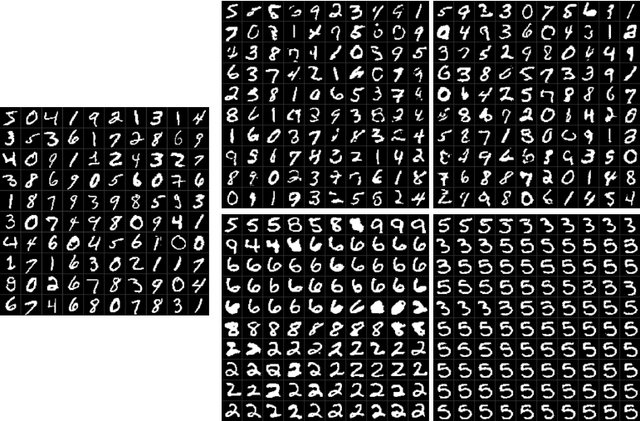

In [135]:
Image(filename='MNIST_gen.jpg')

Breuleux, O., Bengio, Y., & Vincent, P. (2011). Quickly generating representative samples from an rbm-derived process. Neural computation, 23(8), 2058-2073.

However, we can train generative models to create any kind of image. By training a model with this:

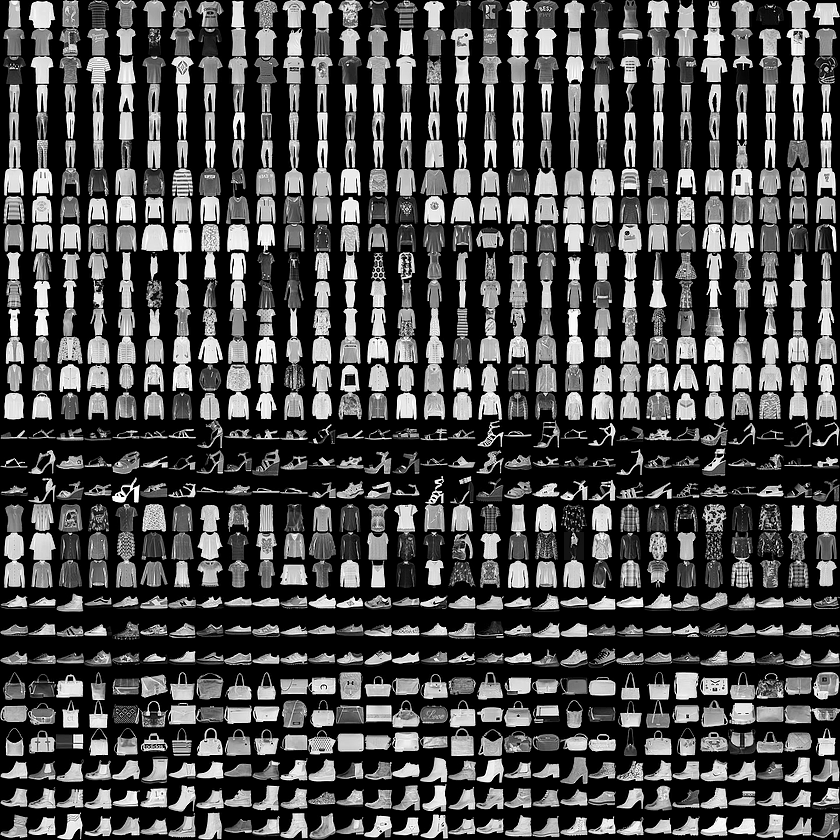

In [136]:
Image(filename='fashion-mnist-sprite.png')

We can generate samples like these:

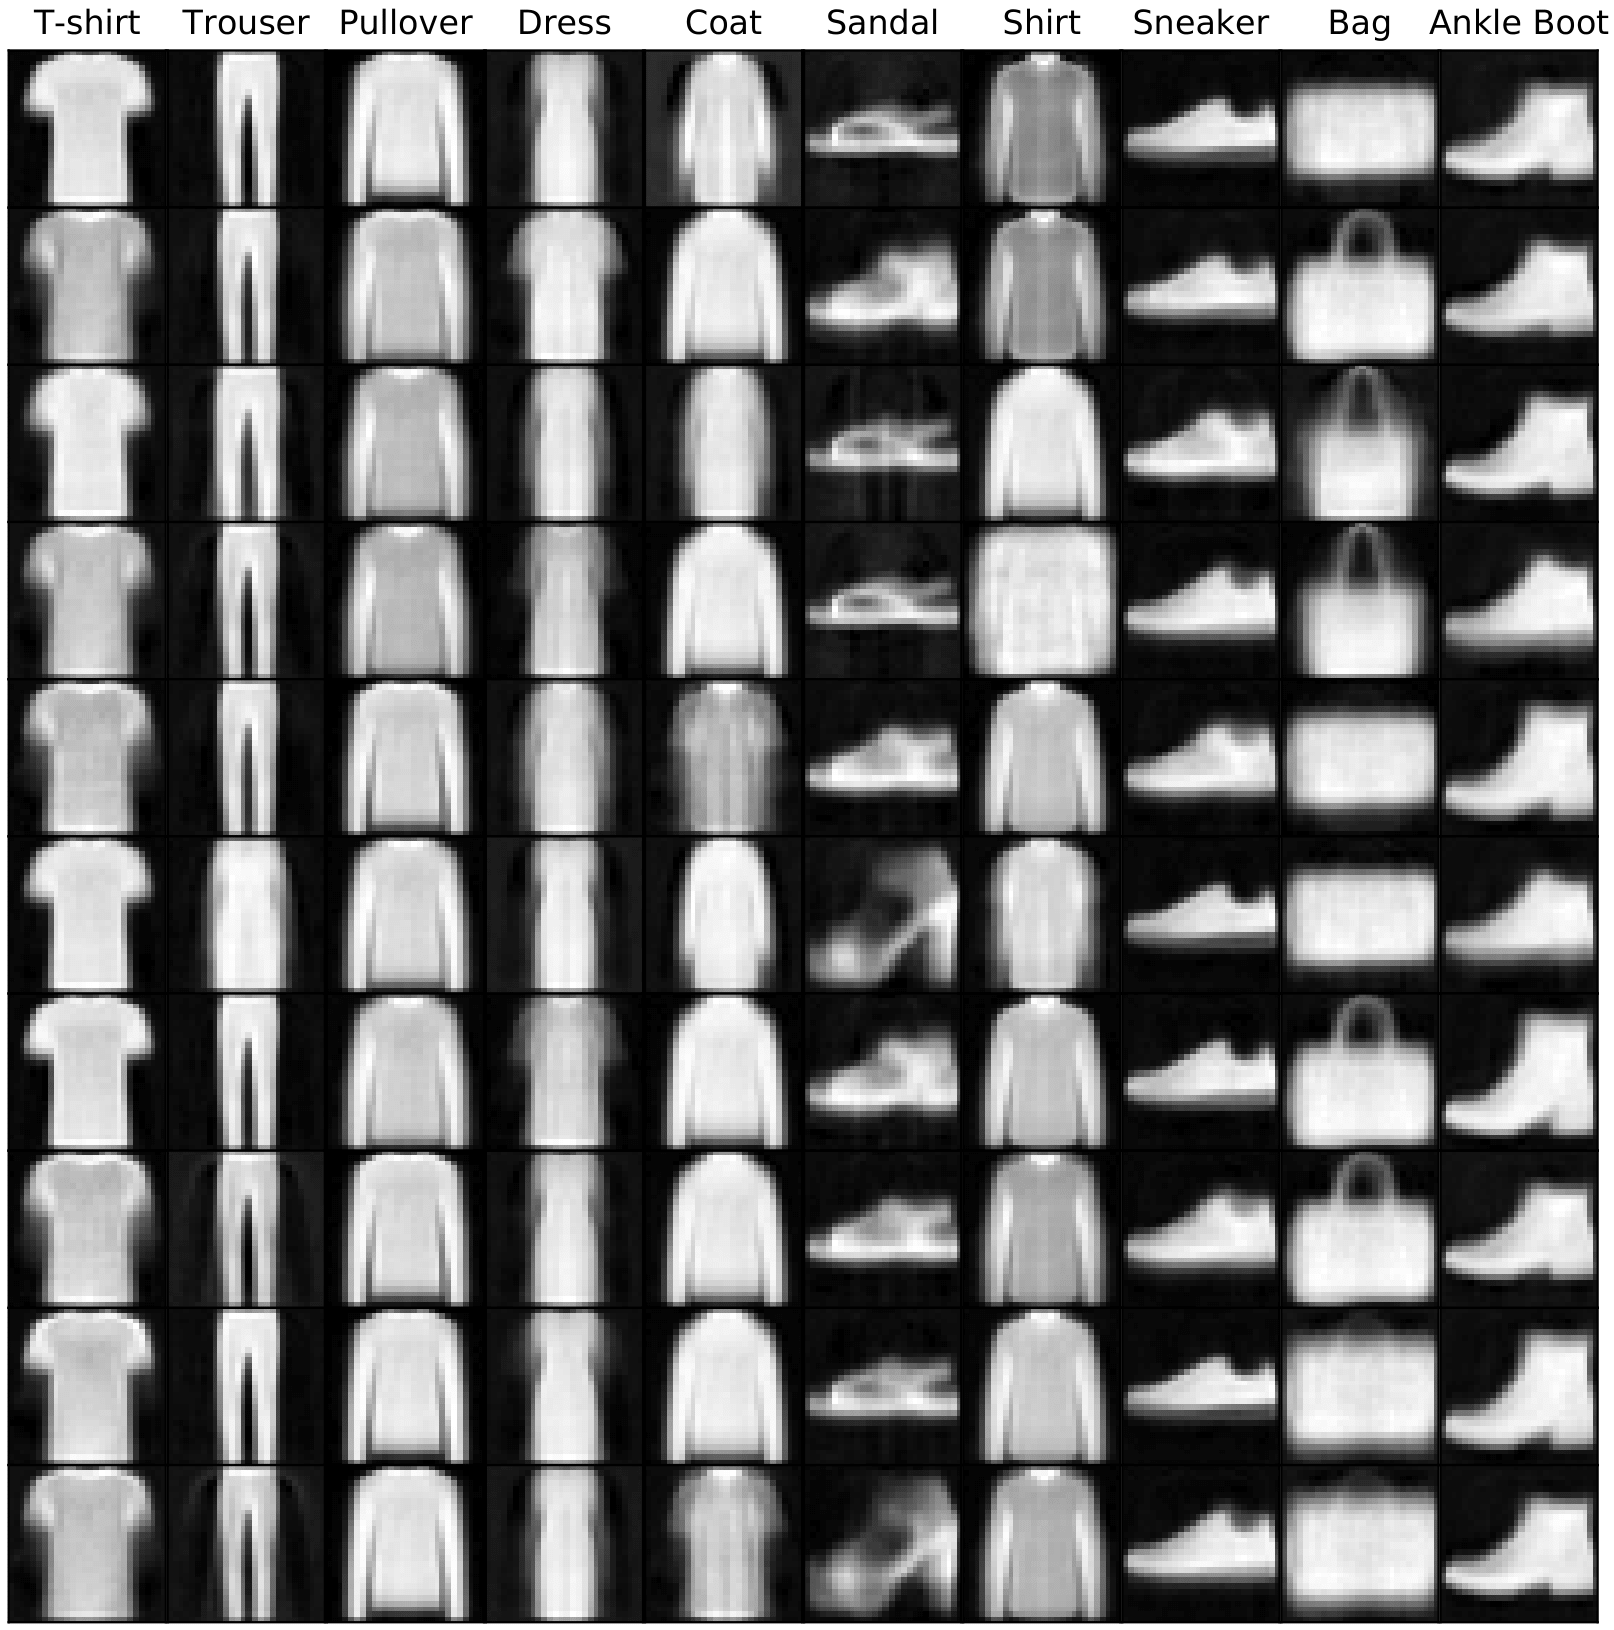

In [137]:
Image(filename='topExamples.png')

Or more complex things, like faces:

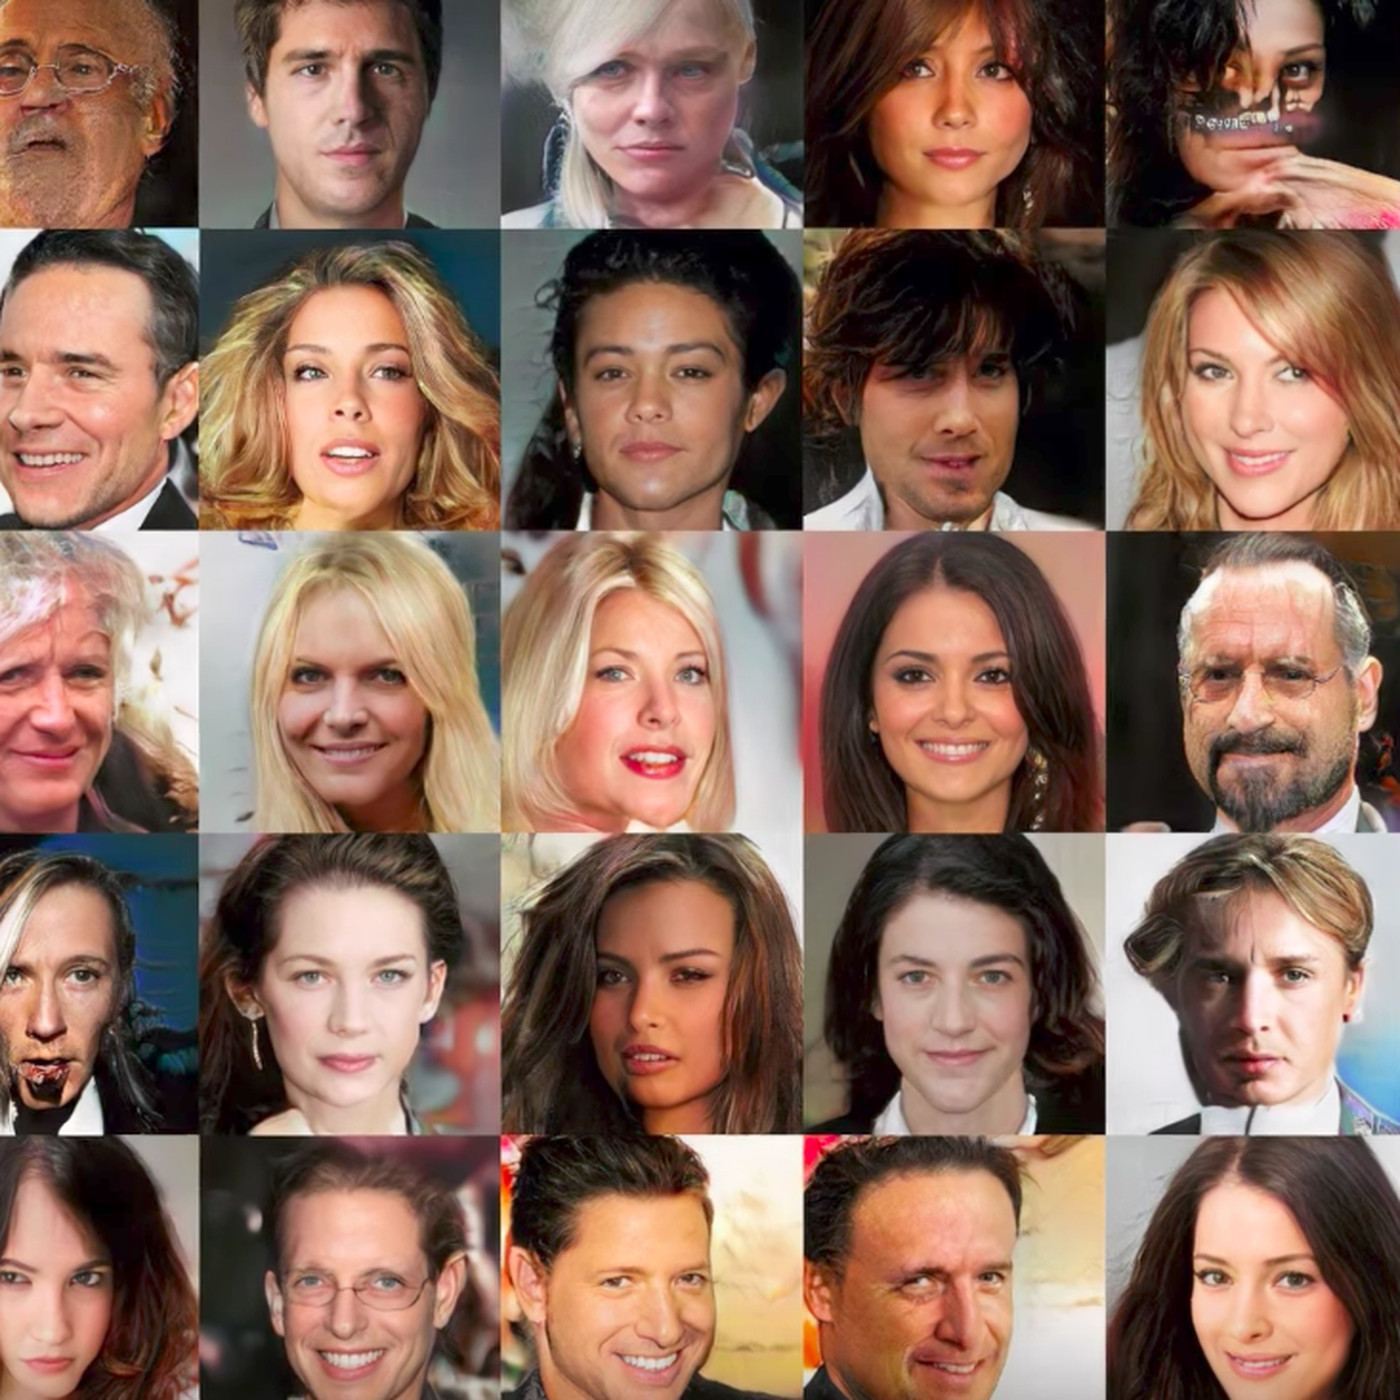

In [138]:
Image(filename='faces.jpeg')

Karras, T., Aila, T., Laine, S., & Lehtinen, J. (2017). Progressive growing of gans for improved quality, stability, and variation. arXiv preprint arXiv:1710.10196.